HW#1 Part 2

MACSS 30100

Delores Tang

## Selecting and fitting a model
### 2. Bias-variance decomposition

a.


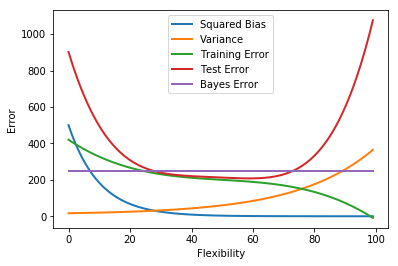

In [84]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0,100)

# Squared bias
bias = lambda n: 100 * 5 / np.exp(5 * n / 50)
biasplot = bias(n)

# Variance
var = lambda n: 50 * (np.exp(n / 50 - 1))**2 + 10
varplot = var(n)

# Training error
tr = lambda n: -170 * (n / 50 - 1)**3 + 250 -  n
trplot = tr(n)

# Test error
test = lambda n: 50 * (2 * n / 50 - 1.9)**4 + 250 - 0.75 * n
testplot = test(n)

# Bayes error
be =  lambda n: 50 * 5 * np.ones(n.size)
beplot = be(n)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Plot error curves
plt.plot(n, biasplot, label='squared bias')
plt.plot(n, varplot, label='variance')
plt.plot(n, trplot, label='training eror')
plt.plot(n, testplot, label='test eror')
plt.plot(n, beplot, label='Bayes error')

plt.setp(ax.lines, linewidth=2)

plt.xlabel('Flexibility')
plt.ylabel('Error')
plt.legend(['Squared Bias', 'Variance', 'Training Error', 'Test Error', 'Bayes Error'])

b. Bias generallly decreases when the flexibility increases because when more flexible models could better fit the sample data and hence reduce the squared error measured by the distance from the observed and the expected value. As flexibility increases further, the squared bias will be infinitely close to 0, but error could never go below 0. Therefore, the blue line representing a squared bias curve shows a rapid decline of error at first and goes more flat gradually.

Variance, opposite to squared bias, increases gradually as flexibility increases. It is because that a flexible method takes into account more training data and gives more variance. 

The green line shows a curve of the training error. Because the estimated model will fit the training set better as the flexibility of it increases, the training error will also reduce as flexibility rises. 

Since the test error relates to both variance and squared bias, a model with lowest test error must have both low squared bias and variance. Thus, the test error has an U shape that combines the characteristics of both curves. When flexibility is low, the test error can be high because inflexible methods can fit the data less accurately. As the flexibility further increases, variance will increase and thus bring the error rate up finally.

Finally, bayes error is the irreducible error, and its curve is represented by the purple line to be constant because it cannot be reduced by varying the models' parameters and flexibility. 


### 3. Classification problems

a. Set your random number generator seed.

In [85]:
# Seed
np.random.seed(100)

b. Simulate a dataset.

In [86]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=200)
x2 = np.random.uniform(low=-1.0, high=1.0, size=200)

c. Calculate Y.

In [98]:
# Define the function that calculates Y
def classifier(x1, x2):
    ## Error term with mu = 0, variance = 0.25 (scale = 0.5)
    err = np.random.normal(loc = 0.0, scale = 0.5, size = len(x1))
    ## Function of Y
    y = x1 + x1**2 + x2 + x2**2 + err
    ## d. The probability of success bounded between [0,1]
    y = np.exp(y) / (1 + np.exp(y))
    ## Round the resulted Y to either success or failure
    y = np.where[y > 0.5, 1, 0]
    
    return y

In [111]:
# Define the function that calculates Y
def classifier(x1, x2):
    # Error term with mu = 0, variance = 0.25 (scale = 0.5)
    err = np.random.normal(loc=0.0, scale=0.5, size=len(x1))
    # Function of Y
    y = x1 + x1**2 + x2 + x2**2 + err
    # d. The probability of success bounded between [0,1]
    pos = np.exp(y) / (1 + np.exp(y))
    # Round the resulted Y to either success or failure
    resY = np.where(pos >= 0.5, 1 , 0)
    
    return resY

In [112]:
# Apply classifier to X1 and X2
y = classifier(x1, x2)

d. Plot the graph

Text(0,0.5,'X2')

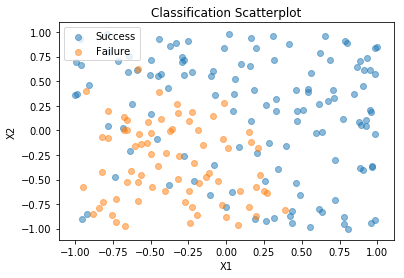

In [120]:
# Scatter plot
plt.scatter(x1[y == 1], x2[y == 1], alpha=0.5, label = 'Success')
plt.scatter(x1[y == 0], x2[y == 0], alpha=0.5, label = 'Failure')
plt.legend()

# Give the plot title and axis labels
plt.title('Classification Scatterplot')
plt.xlabel('X1')
plt.ylabel('X2')

f. Overlay a decision boundary

In [114]:
# Create a mesh grid
h = 0.2
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Text(0,0.5,'X2')

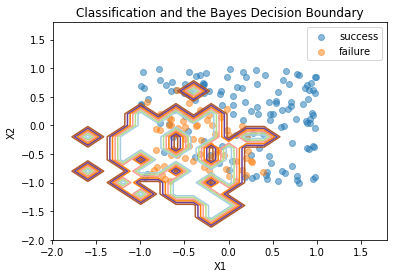

In [121]:
# Plot a Bayes decision boundary
c = classifier(xx.ravel(), yy.ravel())
c = c.reshape(xx.shape)
plt.scatter(x1[y == 1], x2[y == 1], alpha=0.5, label = 'success')
plt.scatter(x1[y == 0], x2[y == 0], alpha=0.5, label = 'failure')
plt.legend()
# Plot the contour
plt.contour(xx, yy, c, cmap=plt.cm.Paired)
plt.title('Classification and the Bayes Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')